# Planetary Habitability Cataloge

#### Hypothesis testing
1. Kepler's Law of Periods  
    1.1. Hypothesis  
    1.2. Orbital Period and Semi-Major axis correlation, R squared and Pearson's tests  

#### Main characteristics
2. Planetary radius against planetary mass  
    2.1. T-test  
    2.2. ANOVA  
3. Stellar Radius against stellar mass  
4. Stellar temperature against stellar radius
5. Planetary radius against stellar mass  
    5.1. T-test  
6. Planetary distance from star
7. ESI (Earth Similarity Index)
8. Ratio of Habitable Planets

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
%matplotlib inline

# Increasing the number of rows and columns shown since database has 65 columns
pd.set_option('display.max_rows', 4000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [268]:
from sqlalchemy import create_engine

driver = 'mysql+pymysql:'
user = 'root'
password = 'xvoldemortx00'
ip = '35.198.146.55'
database = 'exoplanets'
connection_string = f'{driver}//{user}:{password}@{ip}/{database}'
engine = create_engine(connection_string)

In [269]:
# Importing data from SQL
phl = pd.read_sql_query(
'''SELECT * FROM phl
LEFT JOIN pzone_class
ON phl.P_Zone_Class = pzone_class.index

LEFT JOIN pmass_class
ON phl.P_Mass_Class = pmass_class.index

LEFT JOIN pcomp_class
ON phl.P_Composition_Class = pcomp_class.index

LEFT JOIN phab_class
ON phl.P_Habitable_Class = phab_class.index
''', engine)

phl.drop('index', axis=1, inplace=True);

## 1. Kepler's Law of Periods

The third law of Kepler states that the square of the period of any planet is proportional to the cube of the semimajor axis of its orbit.

In [270]:
# Setting style for the whole notebook
sns.color_palette()
sns.set_palette('Set2')
sns.set_context("notebook", font_scale=1.1)
sns.set_style("darkgrid")

In [271]:
# Calculating the squares and cubes
phl['P_Period_days2'] = phl['P_Period_days']**2
phl['P_Sem_Major_Axis_AU3'] = phl['P_Sem_Major_Axis_AU']**3

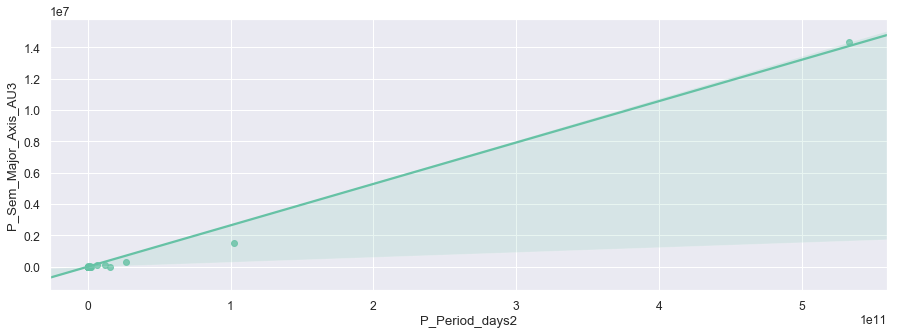

In [272]:
# Plotting to see if there's a lineal relation
sns.set_style("darkgrid")
plt.figure(figsize=(15,5))
sns.regplot(x=phl.P_Period_days2, y=phl.P_Sem_Major_Axis_AU3)

(-0.02, 20000)

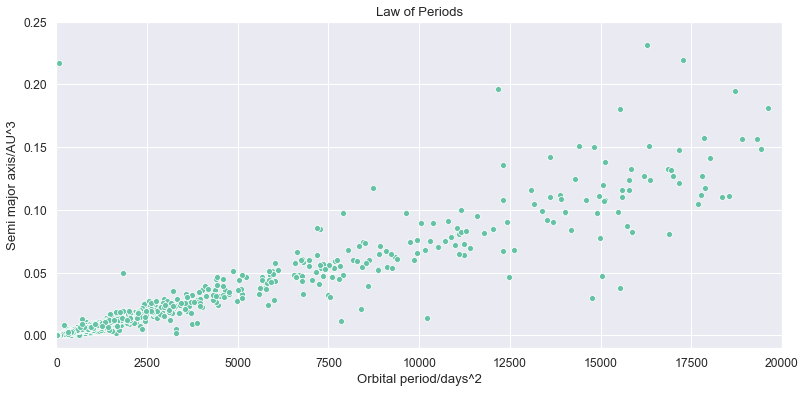

In [273]:
# Zooming in
sns.set_style("darkgrid")
plt.figure(figsize=(13,6))
sns.scatterplot(x="P_Period_days2", y="P_Sem_Major_Axis_AU3", data=phl)
plt.xlabel('Orbital period/days^2')
plt.ylabel('Semi major axis/AU^3')
plt.title('Law of Periods')
plt.ylim([-0.01, 0.25])
plt.xlim([-0.02, 20000])

### 1.1 Hypothesis testing

H$_{0}$ = Kepler's law of periods is not met.

H$_{1}$ = Kepler's law of periods is met.

alpha = 0.05.

### 1.2. Correlation, R squared and Persons's tests between orbital period and semi-major axis

In [274]:
# Selecting only the columns needed for correlation
periods_law = phl[['P_Period_days2', 'P_Sem_Major_Axis_AU3']]
periods_law = periods_law.dropna()

# Correlation
periods_law.corr()

,P_Period_days2,P_Sem_Major_Axis_AU3
P_Period_days2,1.000000,0.995505
P_Sem_Major_Axis_AU3,0.995505,1.000000


In [276]:
# Person's test
stats.pearsonr(periods_law['P_Period_days2'], periods_law['P_Sem_Major_Axis_AU3'])

(0.9955047207526174, 0.0)

In [275]:
# R squared
rsq = ols('P_Period_days2 ~ P_Sem_Major_Axis_AU3', periods_law).fit()
rsq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         P_Period_days2   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 4.089e+05
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:58:01   Log-Likelihood:                -81374.
No. Observations:                3703   AIC:                         1.628e+05
Df Residuals:                    3701   BIC:                         1.628e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.465e+07   1.39e+07      1.772      0.076   -2.62e+06    5.19e+07
P_Sem_Major_Axis_AU3   3.75e+04     58.646    639.438      0.000    3.74e+04    3.76e+04
==============================================================================
Omnibus:                    11297.993   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        807340522.848
Skew:                          45.009   Prob(JB):                         0.00
Kurtosis:                    2288.707   Cond. No.                     2.37e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.2.1. Removing outliers

In [277]:
# Calculating IQR for squared orbital period (P_Period_days2)
Q1 = phl['P_Period_days2'].quantile(.25)
Q3 = phl['P_Period_days2'].quantile(.75)
IQR = Q3 - Q1

# Removing outliers from 'P_Period_days2'
P_Period_days2_o = phl['P_Period_days2'][~((phl['P_Period_days2'] < (Q1 - 3 * IQR)) |(phl['P_Period_days2'] > (Q3 + 3 * IQR)))]

# Calculating IQR for cubed semi major axis (P_Sem_Major_Axis_AU3)
Q1 = phl['P_Sem_Major_Axis_AU3'].quantile(.25)
Q3 = phl['P_Sem_Major_Axis_AU3'].quantile(.75)
IQR = Q3 - Q1

# Removing outliers from 'P_Sem_Major_Axis_AU3'
P_Sem_Major_Axis_AU3_o = phl['P_Sem_Major_Axis_AU3'][~((phl['P_Sem_Major_Axis_AU3'] < (Q1 - 3 * IQR)) |(phl['P_Sem_Major_Axis_AU3'] > (Q3 + 3 * IQR)))]

phl['P_Period_days2_o'] = P_Period_days2_o
phl['P_Sem_Major_Axis_AU3_o'] = P_Sem_Major_Axis_AU3_o


In [278]:
# Selecting rows for correlation
period_law_o = phl[['P_Period_days2_o', 'P_Sem_Major_Axis_AU3_o']]

# Removing NaNs
period_law_o = period_law_o.dropna()

In [279]:
# Testing correlation
period_law_o.corr()

,P_Period_days2_o,P_Sem_Major_Axis_AU3_o
P_Period_days2_o,1.000000,0.962682
P_Sem_Major_Axis_AU3_o,0.962682,1.000000


In [281]:
# Person's test
stats.pearsonr(period_law_o['P_Period_days2_o'], period_law_o['P_Sem_Major_Axis_AU3_o'])

(0.9626824287984526, 0.0)

In [280]:
rsq = ols('P_Period_days2_o ~ P_Sem_Major_Axis_AU3_o', period_law_o).fit()
rsq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       P_Period_days2_o   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 3.774e+04
Date:                Wed, 24 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:58:02   Log-Likelihood:                -22022.
No. Observations:                2985   AIC:                         4.405e+04
Df Residuals:                    2983   BIC:                         4.406e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 48.1652      7.648      6.298      0.000      33.169      63.161
P_Sem_Major_Axis_AU3_o  1.273e+05    655.194    194.280      0.000    1.26e+05    1.29e+05
==============================================================================
Omnibus:                     1753.887   Durbin-Watson:                   1.813
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1113576.867
Skew:                           1.407   Prob(JB):                         0.00
Kurtosis:                      97.580   Cond. No.                         92.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
phl.drop(columns=['P_Period_days2_o', 'P_Sem_Major_Axis_AU3_o'], axis=1, inplace=True)

### Statistical Summary

In [283]:
stats_summary = pd.DataFrame({'Normal': [0.995505, 0.991, (0.995, 0.0)], 'Outliers removed':[0.962682, 0.927, (0.96268, 0.0)]}, index=['Correlation', 'R^2', 'Pearson\'s R'])
stats_summary

,Normal,Outliers removed
Correlation,0.995505,0.962682
R^2,0.991,0.927
Pearson's R,"(0.995, 0.0)","(0.96268, 0.0)"


The correlation/Pearon's R and R squared are higher without the outliers removed.  
The correlation is very high, 0.99. and all the results point to a positive relation between the two variables.  

## 2. Planetary Radius against planetary mass

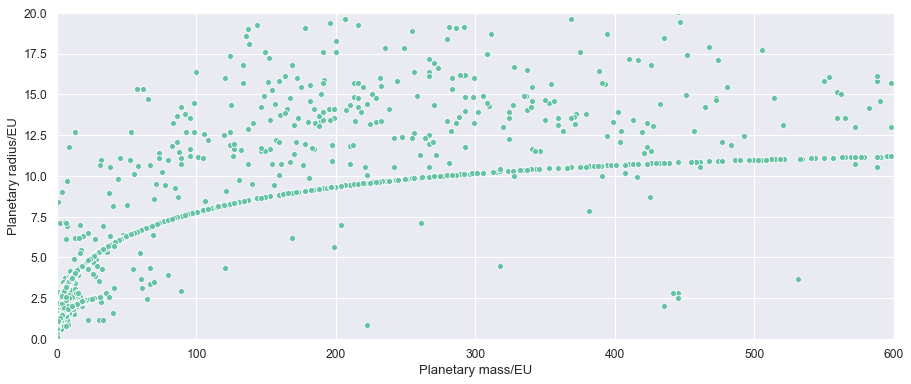

In [284]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='P_Mass_EU', y='P_Radius_EU', data=phl)
plt.xlabel('Planetary mass/EU')
plt.ylabel('Planetary radius/EU')
plt.ylim(0, 20)
plt.xlim(0, 600) 
plt.show()

Zooming in because there seems to be something different close to the axis origin.

(0, 35)

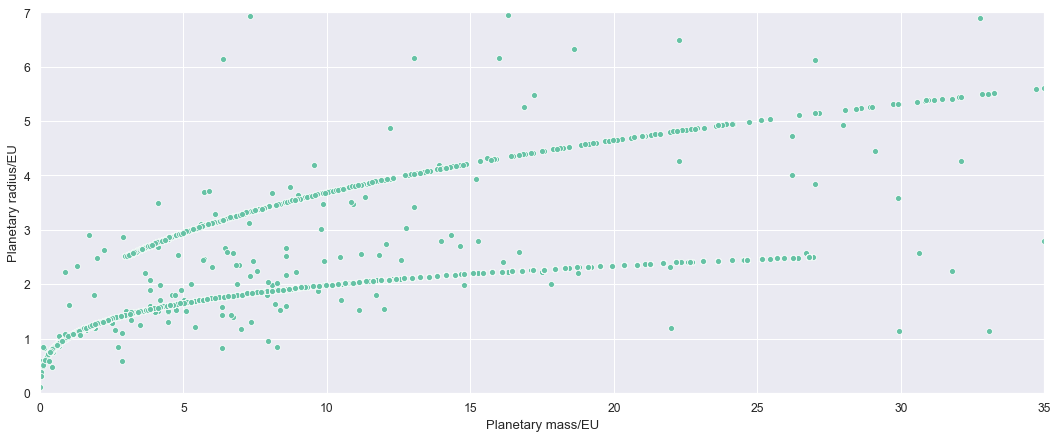

In [285]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='P_Mass_EU', y='P_Radius_EU', data=phl)
plt.xlabel('Planetary mass/EU')
plt.ylabel('Planetary radius/EU')
plt.ylim([0,7])
plt.xlim([0, 35])

The two different lines may be attributed to the type of planet, being the rocky ones at the bottom and the gas in the line at the top.

### By composition classification

(-0.1, 15)

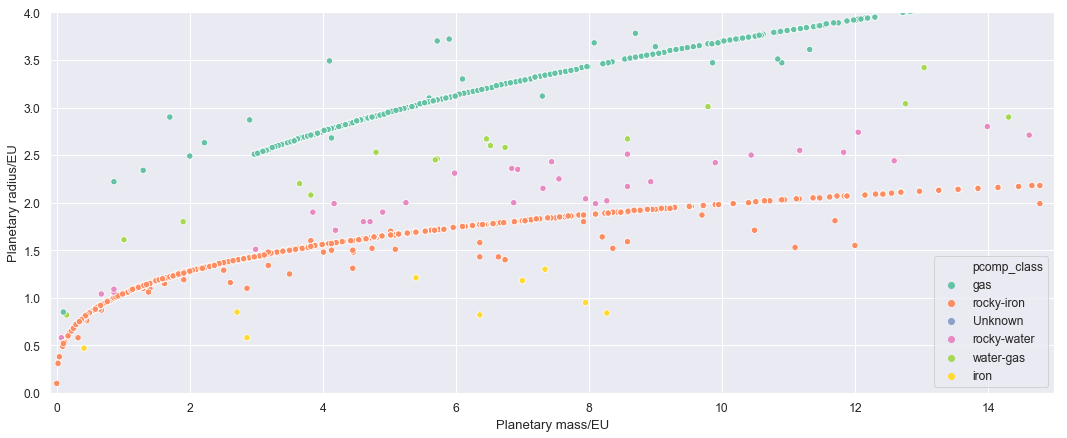

In [286]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='P_Mass_EU', y='P_Radius_EU', hue='pcomp_class', s=40, data=phl)
plt.xlabel('Planetary mass/EU')
plt.ylabel('Planetary radius/EU')
plt.ylim([0, 4])
plt.xlim([-0.1, 15])

The heavier planets are at the bottom are the gaseous ones at the top, with a sequencial increase in between.

In [292]:
# ANOVA

#from statsmodels.stats.anova import AnovaRM

#aovrm = AnovaRM(phl, 'rt', 'Sub_id', within=['cond'])
#res = aovrm.fit()

#print(res)

## 3. Stellar Radius against stellar mass

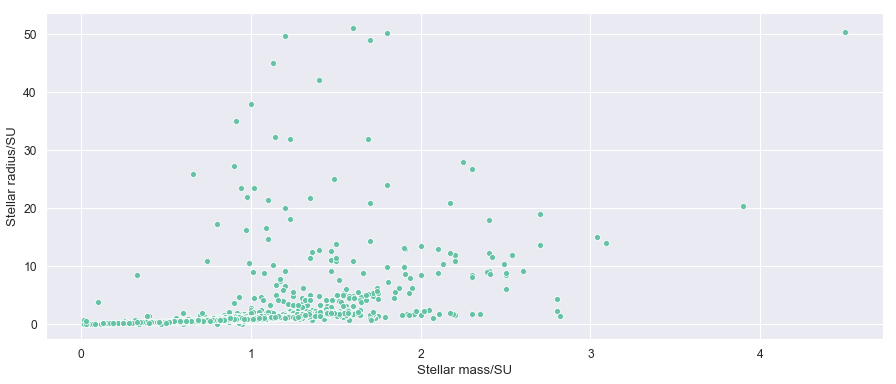

In [293]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.scatterplot(x='S_Mass_SU', y='S_Radius_SU', data=phl)
plt.xlabel('Stellar mass/SU')
plt.ylabel('Stellar radius/SU')
plt.show()

In [294]:
# Removing outliers from star mass

Q1 = phl['S_Mass_SU'].quantile(.25)
Q3 = phl['S_Mass_SU'].quantile(.75)
IQR = Q3 - Q1
IQR

phl_smass_o = phl['S_Mass_SU'][~((phl['S_Mass_SU'] < (Q1 - 3 * IQR)) |(phl['S_Mass_SU'] > (Q3 + 3 * IQR)))]
phl['smass_o'] = phl_smass_o

# Removing outliers from planetary radius 

Q1 = phl['S_Radius_SU'].quantile(.25)
Q3 = phl['S_Radius_SU'].quantile(.75)
IQR = Q3 - Q1
IQR

phl_srad_o = phl['S_Radius_SU'][~((phl['S_Radius_SU'] < (Q1 - 3 * IQR)) |(phl['S_Radius_SU'] > (Q3 + 3 * IQR)))]
phl['srad_o'] = phl_srad_o

What type of star has more habitable planets?

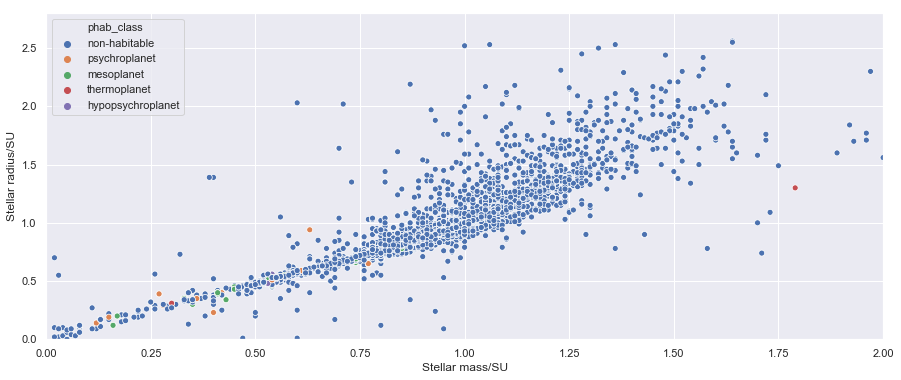

In [313]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.scatterplot(x='smass_o', y='srad_o', hue='phab_class', data=phl)
plt.xlabel('Stellar mass/SU')
plt.ylabel('Stellar radius/SU')
plt.ylim([0, 2.8])
plt.xlim([0, 2])
plt.show()

The graph seems to follow a positive relation, so there is more variability within planetary bodies than stellar.  
Habitable planets seem to be in smaller stars (smaller radius and smaller mass).

# 4. Stellar temperature against stellar radius

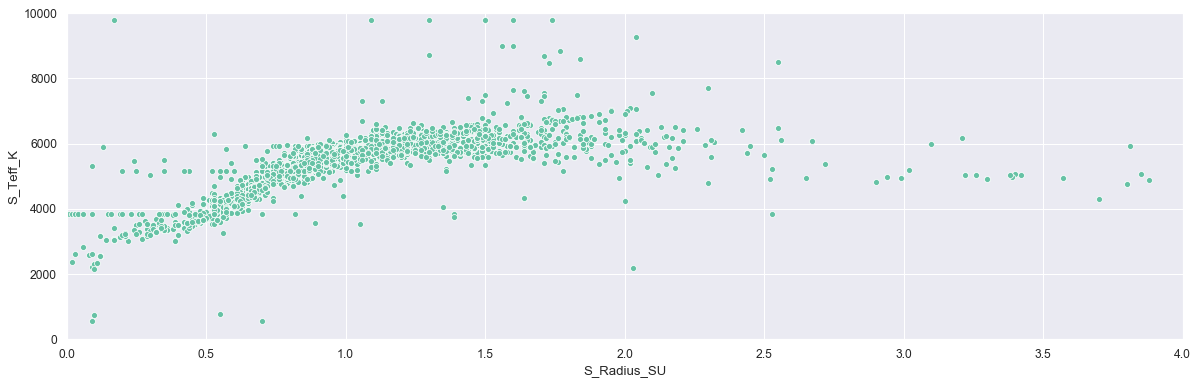

In [296]:
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")
sns.scatterplot(x='S_Radius_SU', y='S_Teff_K', data=phl)
plt.ylim([0, 10000])
plt.xlim([0, 4])
plt.show()

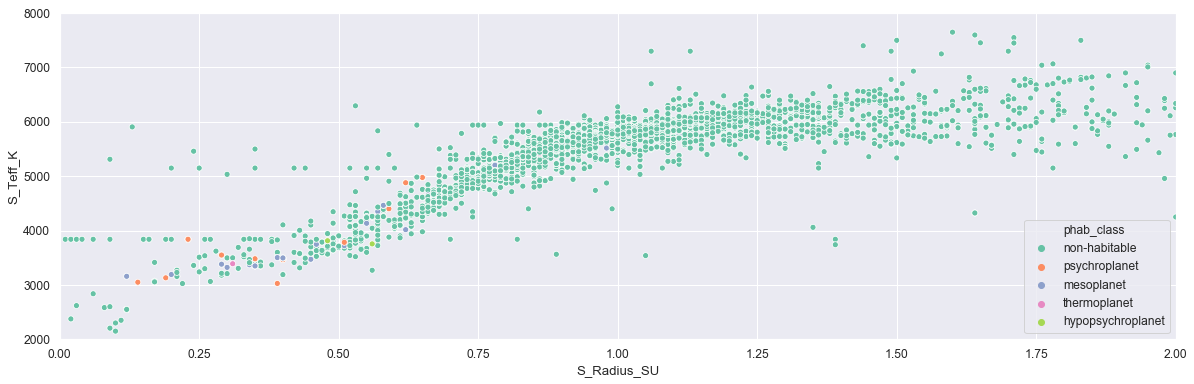

In [297]:
plt.figure(figsize=(20,6))
sns.set_style("darkgrid")
sns.scatterplot(x='S_Radius_SU', y='S_Teff_K', hue='phab_class', data=phl)
plt.ylim([2000, 8000])
plt.xlim([0, 2])
plt.show()

Again, smaller stars have more habitable planets.

# 5. Planetary radius against stellar mass

### 5.1. by Habitability classification  

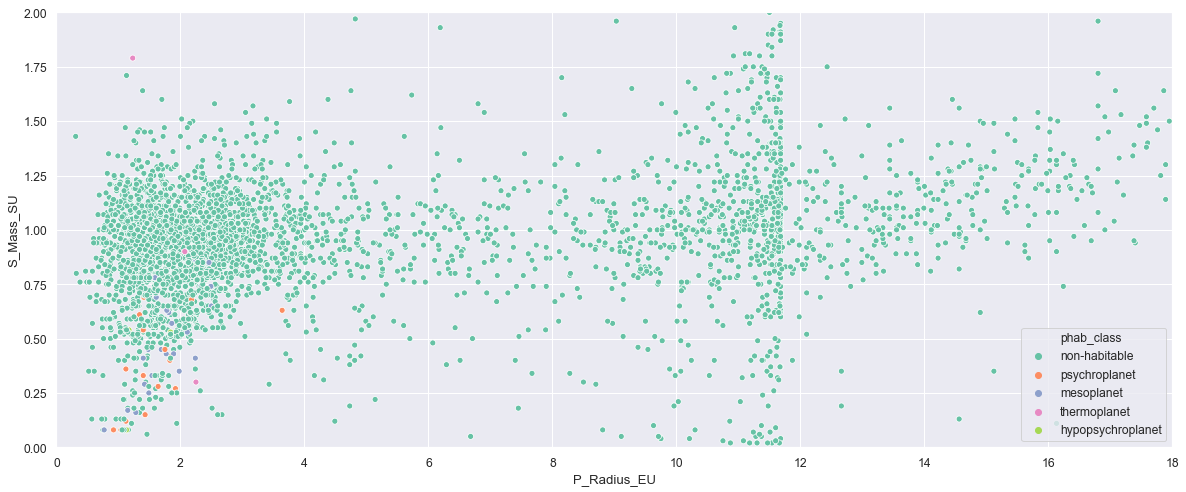

In [298]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.scatterplot(x='P_Radius_EU', y='S_Mass_SU', hue='phab_class', data=phl)
plt.ylim([0, 2])
plt.xlim([0, 18])
plt.show()

There seems to be two main sizes for the exoplanets, (0, 3.5) and around 11.5 radius (in Earth Units). This can correlate with the information found before of two separate lines relating the exoplanets radius with mass. The smaller size group could be the iron/rocky planets, and the ones around 11 the gaseous ones. 

### 5.2. by planet composition

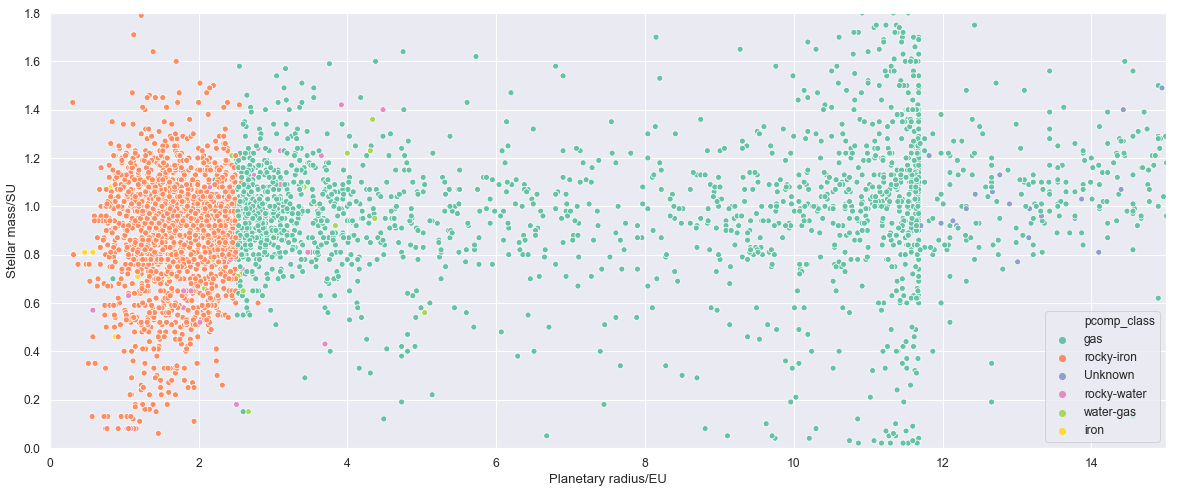

In [300]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.scatterplot(x='P_Radius_EU', y='S_Mass_SU', hue='pcomp_class', data=phl)
plt.xlabel('Planetary radius/EU')
plt.ylabel('Stellar mass/SU')
plt.ylim([0, 1.8])
plt.xlim([0, 15])
plt.show()

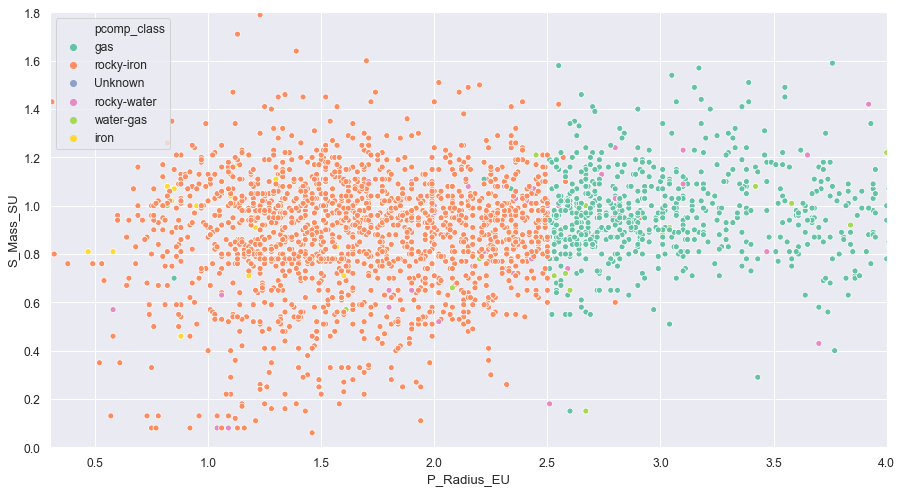

In [301]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.scatterplot(x='P_Radius_EU', y='S_Mass_SU', hue='pcomp_class', data=phl)
plt.ylim([0, 1.8])
plt.xlim([0.3, 4])
plt.show()

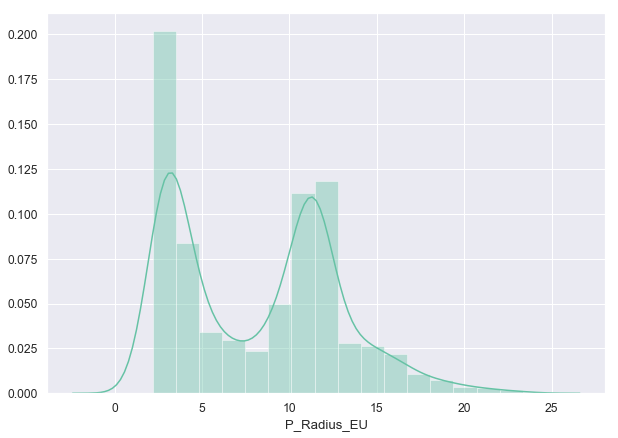

In [290]:
plt.figure(figsize=(10,7))
sns.distplot(jovian)

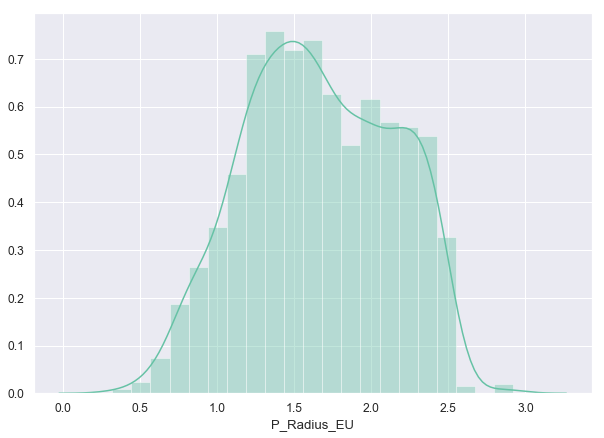

In [291]:
plt.figure(figsize=(10,7))
sns.distplot(rocky)

As suspected, the iron and rocky planets are the ones that make the small size group of exoplanets, and then we have the gaseous ones.   
The radius of the rocky iron planets have a smaller range, between 0.25 to almost 3. On the other hand, the gas planets have a high variance of radius, from 3 to almost 25, and there seems to be bimodal with peaks that correspond to the anomalies seen on the graph.

# T-test
Independent Samples t-test to compare the means for two groups (gas and rocky-iron)

H$_{0}$ = Gas planets and rocky-iron have no significant differences.  
H$_{1}$ = Gas planets and rocky-iron have no significant differences.  
α = 0.05

In [287]:
phl_numeric = phl._get_numeric_data()
phl_numeric.dropna(inplace=True)

Comparing the radius of the planets

In [288]:
jovian = phl_numeric[phl_numeric['P_Composition_Class']==5] 
rocky = phl_numeric[phl_numeric['P_Composition_Class']==2]

jovian = jovian['P_Radius_EU']
rocky = rocky['P_Radius_EU']

In [289]:
from scipy.stats import ttest_ind, ttest_ind_from_stats

stats.ttest_ind(jovian, rocky, equal_var=False)

Ttest_indResult(statistic=60.882693110715486, pvalue=0.0)

# 6. Planetary distance from star

### by zone classification

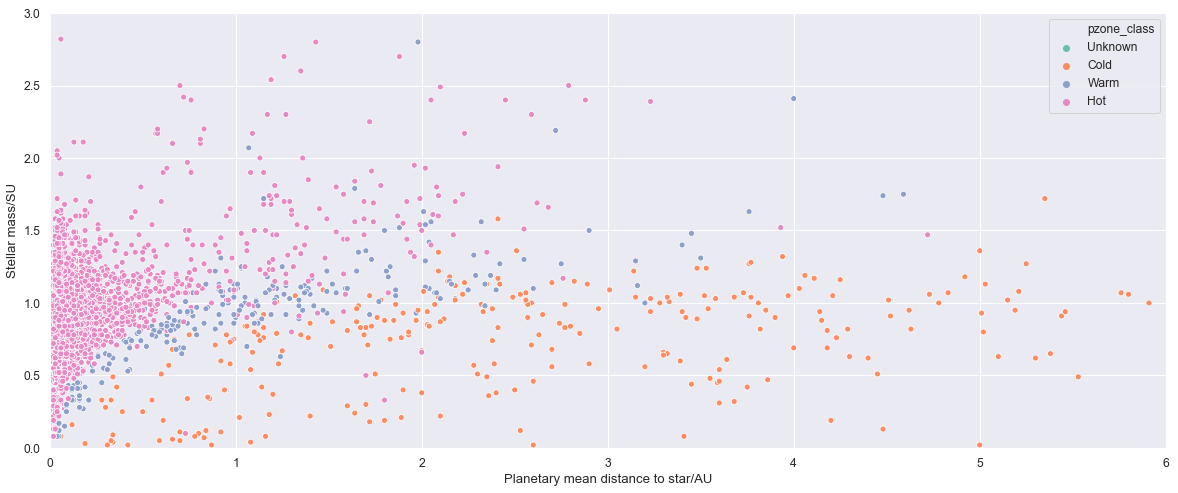

In [302]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.scatterplot(x='P_Mean_Distance_AU', y='S_Mass_SU', hue='pzone_class', data=phl)
plt.xlabel('Planetary mean distance to star/AU')
plt.ylabel('Stellar mass/SU')
plt.ylim([0, 3])
plt.xlim([0, 6])
plt.show()

The coldest exoplanets are farther away, and have a star with a small mass.  
The hottest are closer to the star and the stars are bigger. 

### by planet composition

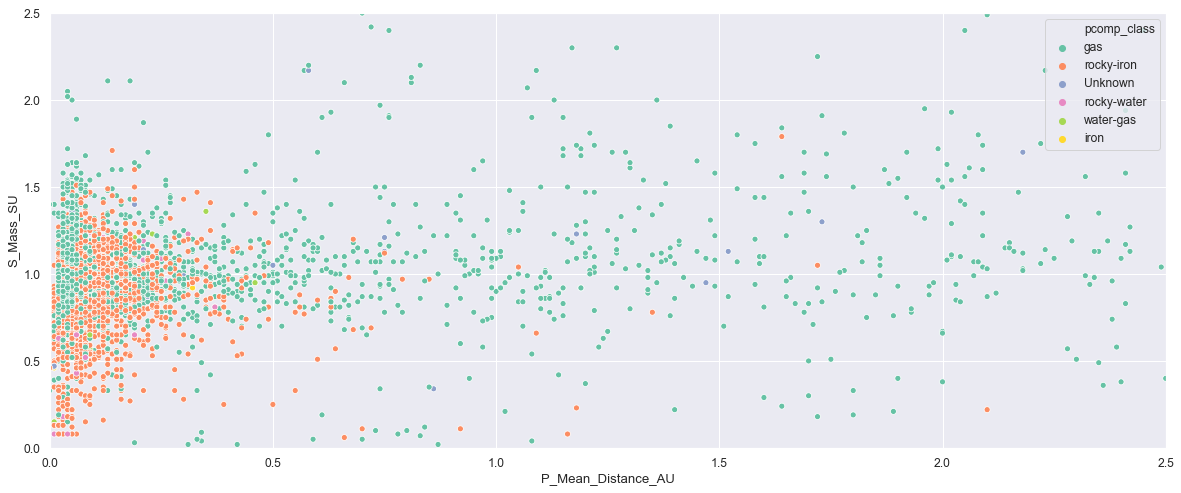

In [304]:
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.scatterplot(x='P_Mean_Distance_AU', y='S_Mass_SU', hue='pcomp_class', data=phl)
plt.ylim([0, 2.5])
plt.xlim([0, 2.5])
plt.show()

The rocky-iron planets are closer to the star, as the distance is higher the exoplanets go from rocky to gas.

# 7. ESI (Earth Similarity Index)

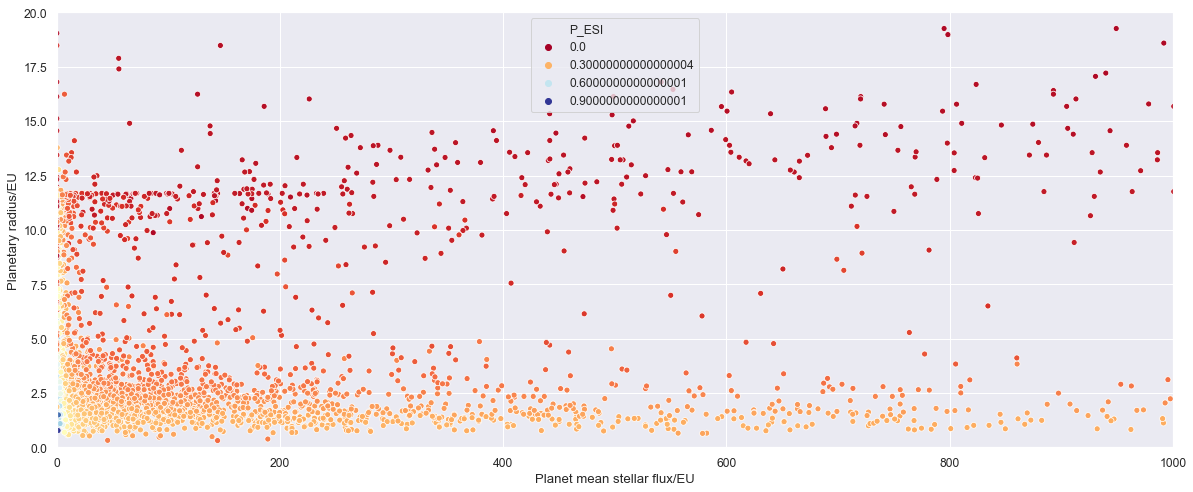

In [305]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(x='P_SFlux_Mean_EU', y='P_Radius_EU', hue='P_ESI', palette='RdYlBu', data=phl)
plt.xlabel('Planet mean stellar flux/EU')
plt.ylabel('Planetary radius/EU')
plt.ylim([0, 20])
plt.xlim([0.01, 1000])
plt.show()

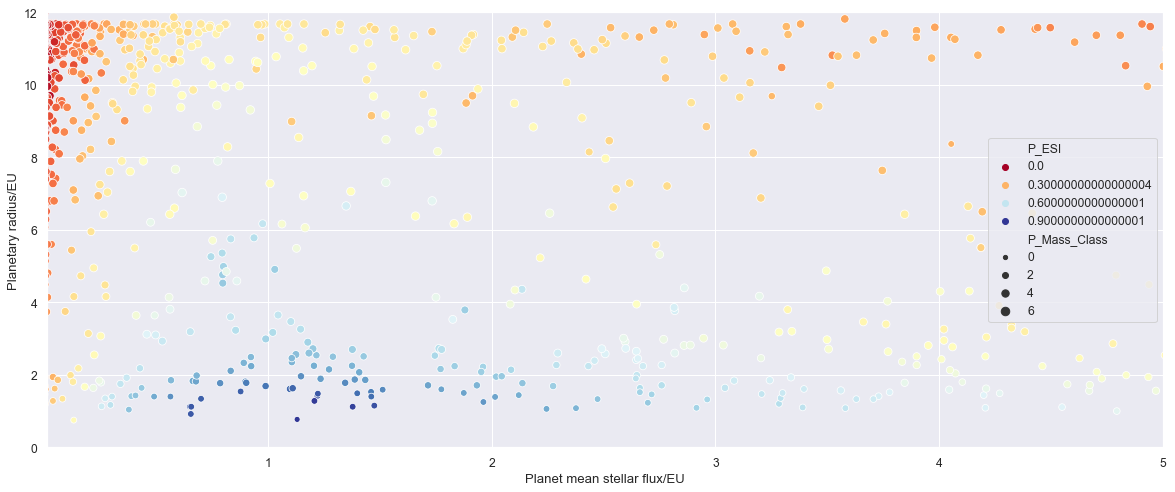

In [306]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(20,8))
sns.scatterplot(x='P_SFlux_Mean_EU', y='P_Radius_EU', hue='P_ESI', size='P_Mass_Class', palette='RdYlBu', data=phl)
plt.xlabel('Planet mean stellar flux/EU')
plt.ylabel('Planetary radius/EU')
plt.ylim([0, 12])
plt.xlim([0.01, 5])
plt.show()

# 8. Ratio of habitable planets

In [307]:
print('Total number of confirmed exoplanets:', phl.shape)
print('Total number of planets in the habitable zone of its star:', phl[phl['S_No_Planets_HZ']==1].shape)
print('Total number of habitable planets:', (phl[phl['P_Habitable']==1]).shape)

Total number of confirmed exoplanets: (3873, 49)
Total number of planets in the habitable zone of its star: (324, 49)
Total number of habitable planets: (55, 49)


### Number of planets a star has

Text(0, 0.5, 'Number of stars')

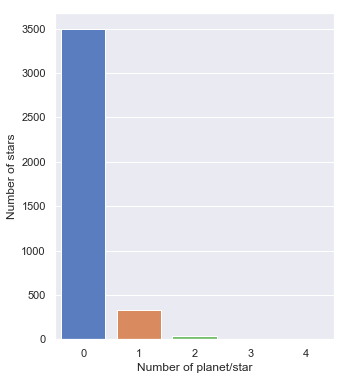

In [308]:
plt.figure(figsize=(5,6))
sns.set(style="darkgrid")
sns.countplot(x="S_No_Planets_HZ", palette="muted",  data=phl)
plt.xlabel('Number of planet/star')
plt.ylabel('Number of stars')

### Number of habitable planets

Text(0.5, 0, 'Habitability')

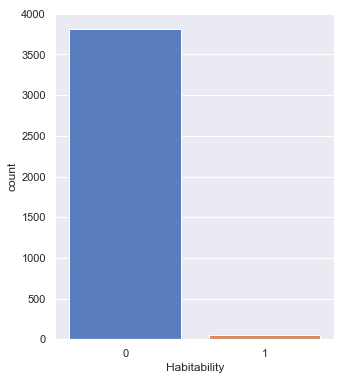

In [309]:
plt.figure(figsize=(5,6))
sns.set(style="darkgrid")
sns.countplot(x="P_Habitable", palette="muted",  data=phl)
plt.xlabel('Habitability')

In [310]:
total = 3873
habit_zone = 324
habitable = 55

print(round((habit_zone/total)*100, 2), '% of the confirmed exoplanets are found in the habitable zone of its star.')
print(round(habitable/habit_zone*100, 2), '% of planets in the habitable zone are habitable.')
print(round(habitable/total*100,2), '% of the confirmed exoplanets are habitable.')

8.37 % of the confirmed exoplanets are found in the habitable zone of its star.
16.98 % of planets in the habitable zone are habitable.
1.42 % of the confirmed exoplanets are habitable.
